In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

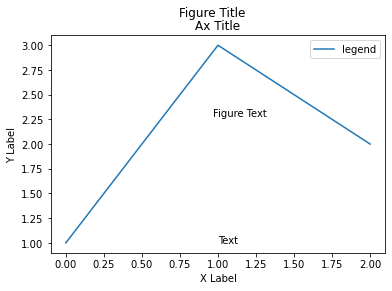

In [2]:
fig, ax = plt.subplots()

fig.suptitle("Figure Title")

ax.plot([1,3,2], label='legend')
ax.legend()

ax.set_title('Ax Title') 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1, y=1, s="Text")
fig.text(0.5, 0.6, s="Figure Text")

plt.show()

# Text Properties

## font components

- family
- size or fontsize
- style or fontstyle
- weight or fontweight

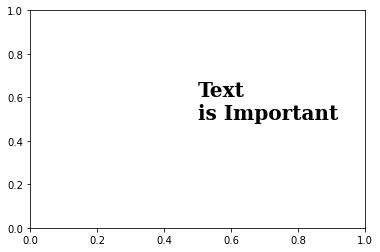

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif')
plt.show()

## details

- color
- linespacing
- backgroudcolor
- alpha
- zorder
- visible

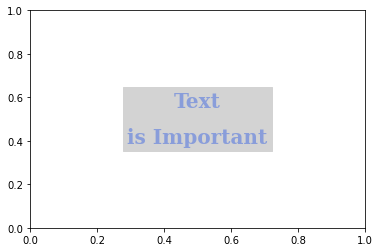

In [14]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=.5,
        va='center',
        ha='center',
        rotation='horizontal')
plt.show()

## Advanced

- bbox

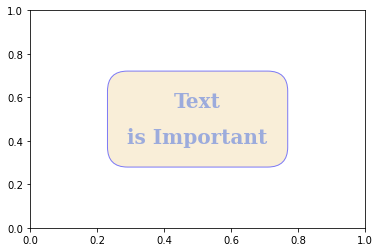

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=.5,
        va='center',
        ha='center',
        rotation='horizontal',
        bbox = dict(boxstyle='round', 
                    facecolor='wheat', 
                    ec='blue',
                    pad=1,
                    alpha=0.5))
plt.show()

# Text API 실습

## 기본적인 플롯

In [20]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


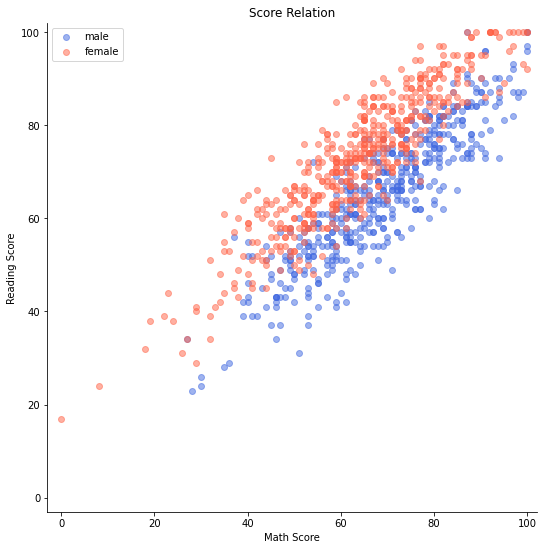

In [26]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender'] == g]
    ax.scatter(x=student_sub['math score'], y=student_sub['reading score'],
               c=c,
               alpha=0.5,
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation')
ax.legend()

plt.show()

## title & legend

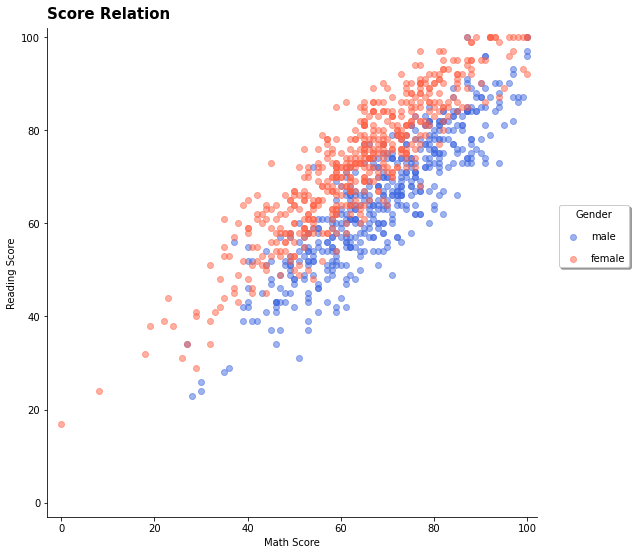

In [33]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender'] == g]
    ax.scatter(x=student_sub['math score'], y=student_sub['reading score'],
               c=c,
               alpha=0.5,
               label=g)
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation',
             loc='left', 
             va='bottom', 
             fontweight='bold',
             fontsize=15)
ax.legend(title='Gender',
          shadow=True,
          labelspacing=1.2,
          loc='lower right',
          bbox_to_anchor=[1.2,0.5],
#          ncol=2
          )

plt.show()

## Ticks & Text
- tick을 없애거나 조정하는 방법
- text의 alignment가 필요한 이유

In [34]:
student['math score'].head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [36]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1:
        return '0-10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0-10          2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

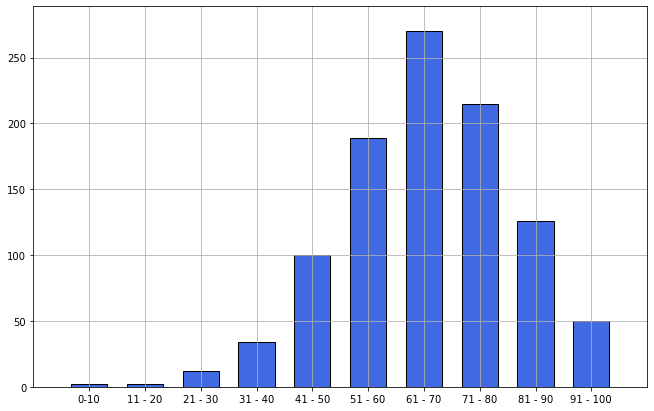

In [38]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.bar(math_grade.index, math_grade,
       width=0.65,
       color='royalblue',
       linewidth=1,
       edgecolor='black')

ax.margins(0.07)
ax.grid()
plt.show()

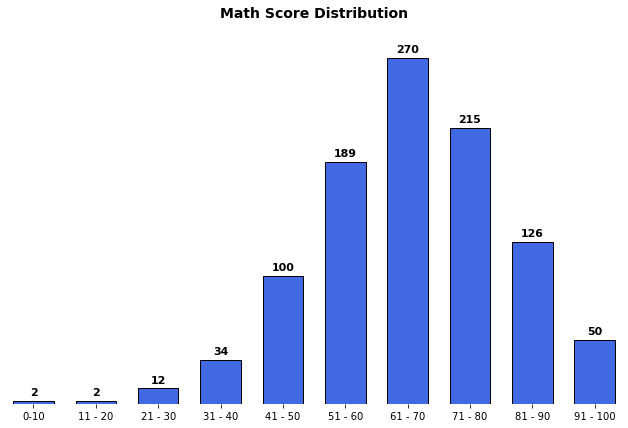

In [54]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.bar(math_grade.index, math_grade,
       width=0.65,
       color='royalblue',
       linewidth=1,
       edgecolor='black')

ax.margins(0.01, 0.1)
ax.set(frame_on=False)
ax.set_yticks([])
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx,val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha= 'center',
            fontsize=11, fontweight='semibold')


plt.show()

## Annotate

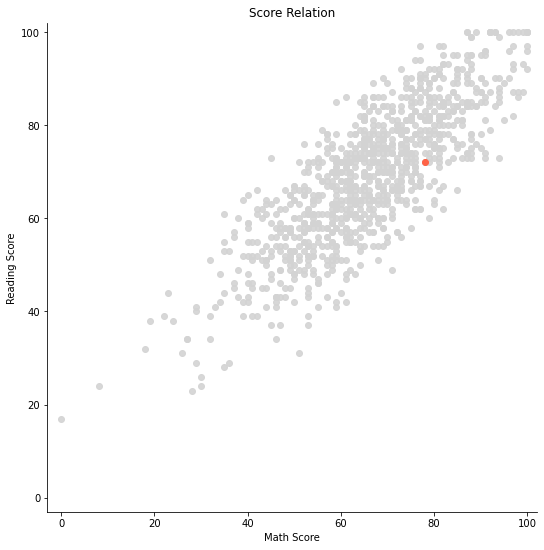

In [55]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9,
           zorder=5)

ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1,
           zorder=10)

ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation')

plt.show()

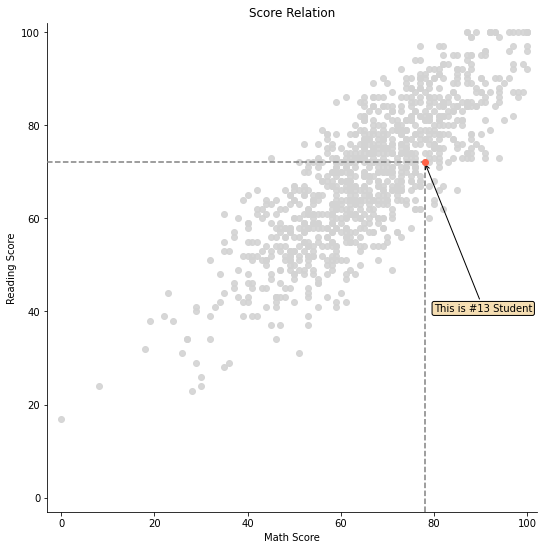

In [59]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
           c='lightgray',
           alpha=0.9,
           zorder=5)

ax.scatter(x=student['math score'][i], y=student['reading score'][i],
           c='tomato',
           alpha=1,
           zorder=10)

ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation')

#평행선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
        color='gray', linestyle='--',
        zorder=8)

bbox = dict(boxstyle='round', fc='wheat', pad=0.2)
arrowprops = dict(arrowstyle='->')

ax.annotate(text=f'This is #{i} Student',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80,40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9)

plt.show()